In [1]:
pip install google.colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2
from PIL import Image
from matplotlib import cm
from google.colab.patches import cv2_imshow
import os

loc = "/content/drive/My Drive/dataset/"
ipath = os.listdir(loc)


def findResistance(a, b, c, d):
      
    # Hash-map to store the values 
    # of the color-digits
    color_digit = {'black': '0',
                   'brown': '1', 
                   'red': '2',
                   'orange': '3', 
                   'yellow': '4',
                   'green' : '5', 
                   'blue' : '6',
                   'violet' : '7', 
                   'grey' : '8',
                   'white': '9'}
      
    multiplier = {'black': '1',
                  'brown': '10', 
                  'red': '100', 
                  'orange': '1k', 
                  'yellow': '10k', 
                  'green' : '100k', 
                  'blue' : '1M', 
                  'violet' : '10M', 
                  'grey' : '100M', 
                  'white': '1G'}
      
    tolerance = {'brown': '+/- 1 %', 
                  'red' : '+/- 2 %', 
                 'green': "+/- 0.5 %", 
                  'blue': '+/- 0.25 %', 
                 'violet' : '+/- 0.1 %', 
                  'gold': '+/- 5 %', 
                 'silver' : '+/- 10 %', 
                  'none': '+/-20 %'}
      
    if a in color_digit  and b in color_digit  and c in multiplier and d in tolerance:
      xx = color_digit.get(a)
      yy = color_digit.get(b)
      zz = multiplier.get(c)
      aa = tolerance.get(d)
      print("Resistance = "+xx + yy+ " x "+zz+" ohms "+aa)
    else:
      print("Invalid Colors")

0


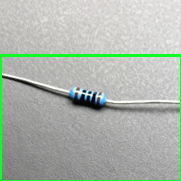

Invalid Colors
None
1


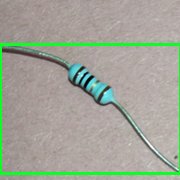

Resistance = 11 x 10 ohms +/- 1 %
None
2


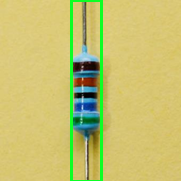

Invalid Colors
None
3


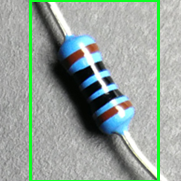

Resistance = 11 x 10 ohms +/- 1 %
None
4


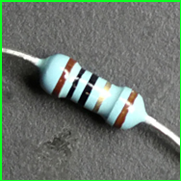

Invalid Colors
None
5


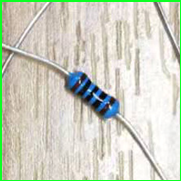

Resistance = 11 x 10 ohms +/- 1 %
None


'brown'

In [8]:
import cv2
import numpy as np

for k in range(len(ipath)):
  print(k)
  # Load image, convert to grayscale, Gaussian blur, Otsu's threshold
  image = cv2.imread(loc+ipath[k])
  original = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3,3), 0)
  thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # Obtain bounding rectangle and extract ROI
  x,y,w,h = cv2.boundingRect(thresh)
  cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
  ROI = original[y:y+h, x:x+w]

  # Add alpha channel
  b,g,r = cv2.split(ROI)
  alpha = np.ones(b.shape, dtype=b.dtype) * 50
  ROI = cv2.merge([b,g,r,alpha])

  #cv2_imshow(thresh)
  cv2_imshow( image)
  #cv2_imshow( ROI)

  rgb = Image.fromarray(ROI).convert('RGB')
  q = rgb.quantize(colors=7,method=2)

  # Now look at the first 2 colours, each 3 RGB entries in the palette:
  l = q.getpalette()[:12]

  ll=[]
  for i in range(0,12,3):
    ll.append([l[i],l[i+1],l[i+2]])

  colours = ( (165,42,42, "brown"),
              (255, 0, 0, "red"),
              (128, 0, 0, "red"),
              (255, 255, 0, "yellow"),
              (0,255,0,'green' ),
              (0,0,0,'black'))


  def nearest_colour( subjects, query ):
      return min( subjects, key = lambda subject: sum( (s - q) ** 2 for s, q in zip( subject, query ) ) )

  for i in range(len(ll)):
    requested_colour = (ll[i][0],ll[i][1],ll[i][2])
    c1 = nearest_colour( colours, requested_colour )[-1]# dark red
    c2 = nearest_colour( colours, requested_colour )[-1]
    c3 = nearest_colour( colours, requested_colour )[-1]
    c4 = nearest_colour( colours, requested_colour )[-1]

  #print('colors : ',[c1,c2,c3,c4])
  print(findResistance(c1, c2, c3,c4))


nearest_colour( colours, requested_colour )[-1]
